<a href="https://colab.research.google.com/github/sananaz-git/city_of_whittlesea/blob/main/MyFactorAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# City of Whittlesea Household survey Factor Analysis


Datasets:  

1.   Whittlesea - 2021 Household Survey - household_sav
2.   Whittlesea - 2021 Household Survey - person_sav





In [57]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
filepath = "/content/person_sav_cleaned.csv"
person_df = pd.read_csv(filepath)

In [4]:
filepath = "/content/household_sav_cleaned.csv"
household_df = pd.read_csv(filepath)

In [5]:
pd.options.display.max_rows = 1545
pd.options.display.max_columns = 400

In [49]:
person_df.head() # First 5 records of person dataset

,Unnamed: 0,Q1 Selfdescribe,Q13 Other,Q24 Other,Q26,Q27,Q30 Other,Q34 Other,Q35 Other,Q36 Other,No of person,Person no,Precinct,Q11,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 3,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q23,Q24,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,Q38,income,Q4,Q5,q7 LOTE,Q8,Q9,SAL,Surveyno_survey_df,Weight,SA1 Label,SA2 Name,Precinct.1,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan
0,0,NaN,NaN,NaN,Professionals,Healthcare and Social Assistance,NaN,NaN,NaN,NaN,4,1,11.0,No,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,35.0,37.0,0,1,0,0,0,1,0,0,0,0.0,2.0,1,0,0,0,0,0,0,0,4,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,725,others,10 or more years,0.0,0.0,0.5,1111111,1,0.257569,1111111,Unknown,Unknown,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,11.0,No,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,2.0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,others,1 to less than 5 years,0.0,0.0,0.5,1111111,1,0.257569,1111111,Unknown,Unknown,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,NaN,NaN,NaN,Gig economy workers,Administrative and Support Services,NaN,NaN,NaN,NaN,4,3,11.0,No,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,36.0,37.0,0,0,0,0,0,0,0,0,0,0.0,2.0,1,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,900,others,5 to less than 10 years,0.0,0.0,0.5,1111111,1,0.257569,1111111,Unknown,Unknown,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,11.0,possiblely yes,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,32.0,32.0,0,0,0,0,0,0,0,0,0,1.0,9.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,others,1 to less than 5 years,0.0,0.0,0.5,1111111,1,0.257569,1111111,Unknown,Unknown,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,NaN,NaN,NaN,Technicians/Trades/Machinery Operations Workers,Public Administration/Government,NaN,NaN,NaN,NaN,3,1,10.0,No,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,32.0,32.0,0,0,0,0,0,0,0,0,0,0.0,1.0,1,0,0,0,0,0,0,0,3,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1625,Australians,NaN,1.0,NaN,7.5,209041

In [7]:
print(person_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Columns: 213 entries, Unnamed: 0 to Q32_nan
dtypes: float64(10), int64(189), object(14)
memory usage: 2.5+ MB
None


1545 rows and 213 columns in person dataset

In [8]:
person_df.shape

(1545, 213)

#Preparing person Dataset for Factor Analysis ensuring outliers are removed, standard is scaled and the data features have to be numeric

In [9]:
cat_person_df = person_df.select_dtypes(include=['object']).copy()

In [81]:
num_person_df = person_df.select_dtypes(include=['int64','float64']).copy()

Category columns from data extracted into cat df and numeric columns into num df

In [11]:
cat_person_df.head()

,Q1 Selfdescribe,Q13 Other,Q24 Other,Q26,Q27,Q30 Other,Q34 Other,Q35 Other,Q36 Other,Q11,Q4,Q5,SA2 Name,Precinct.1
0,NaN,NaN,NaN,Professionals,Healthcare and Social Assistance,NaN,NaN,NaN,NaN,No,others,10 or more years,Unknown,Unknown
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,others,1 to less than 5 years,Unknown,Unknown
2,NaN,NaN,NaN,Gig economy workers,Administrative and Support Services,NaN,NaN,NaN,NaN,No,others,5 to less than 10 years,Unknown,Unknown
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,possiblely yes,others,1 to less than 5 years,Unknown,Unknown
4,NaN,NaN,NaN,Technicians/Trades/Machinery Operations Workers,Public Administration/Government,NaN,NaN,NaN,NaN,No,Australians,NaN,Whittlesea,Whittlesea Township and Surrounds


Numeric columns extracted

In [51]:
num_person_df.head()

,Unnamed: 0,No of person,Person no,Precinct,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 3,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q23,Q24,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,Q38,income,q7 LOTE,Q8,Q9,SAL,Surveyno_survey_df,Weight,SA1 Label,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan
0,0,4,1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,35.0,37.0,0,1,0,0,0,1,0,0,0,0.0,2.0,1,0,0,0,0,0,0,0,4,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,725,0.0,0.0,0.5,1111111,1,0.257569,1111111,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,4,2,11.0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,2.0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0.0,0.0,0.5,1111111,1,0.257569,1111111,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,4,3,11.0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,36.0,37.0,0,0,0,0,0,0,0,0,0,0.0,2.0,1,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,900,0.0,0.0,0.5,1111111,1,0.257569,1111111,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3,4,4,11.0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,32.0,32.0,0,0,0,0,0,0,0,0,0,1.0,9.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0.0,0.0,0.5,1111111,1,0.257569,1111111,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,3,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,32.0,32.0,0,0,0,0,0,0,0,0,0,0.0,1.0,1,0,0,0,0,0,0,0,3,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1625,1.0,NaN,7.5,20904122528,2,0.299062,20904122528,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [82]:
num_person_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Columns: 199 entries, Unnamed: 0 to Q32_nan
dtypes: float64(10), int64(189)
memory usage: 2.3 MB


In [30]:
print(cat_person_df.isnull().sum())

Q1 Selfdescribe    1544
Q13 Other          1532
Q24 Other          1543
Q26                 687
Q27                 703
Q30 Other          1534
Q34 Other          1544
Q35 Other          1517
Q36 Other          1483
Q11                   0
Q4                    0
Q5                  912
SA2 Name            562
Precinct.1          562
dtype: int64


Check for NAs in numeric columns. 

In [14]:
#print(num_person_df.isna().sum())
num_person_df.isna().sum()

Unnamed: 0              0
No of person            0
Person no               0
Precinct                1
Q13 1                   0
Q13 10                  0
Q13 11                  0
Q13 12                  0
Q13 2                   0
Q13 3                   0
Q13 4                   0
Q13 5                   0
Q13 6                   0
Q13 7                   0
Q13 8                   0
Q13 9                   0
Q16                     0
Q18 1                   0
Q18 10                  0
Q18 11                  0
Q18 12                  0
Q18 13                  0
Q18 14                  0
Q18 2                   0
Q18 3                   0
Q18 4                   0
Q18 5                   0
Q18 6                   0
Q18 7                   0
Q18 8                   0
Q18 9                   0
Q18 Disability          0
Q19 1                   0
Q19 2                   0
Q19 3                   0
Q19 4                   0
Q19 5                   0
Q19 6                   0
Q19 7       

Let's remove unwanted columns from numeric dataframe

In [83]:
cols = ['Unnamed: 0','No of person','Precinct', 'q7 LOTE', 'SAL', 'Surveyno_survey_df', 'Weight', 'SA1 Label', 'Q8', 'Q2', 'Q24', 'Q18 3']
num_person_df = num_person_df.drop(cols, axis=1)

We are filling NAs in the entire Dataframe with top i.e mode most frequent value from say column 'Q1 Selfdescribe'. 

In [11]:
#cat_person_df = cat_person_df.fillna(cat_person_df['Q1 Selfdescribe'].value_counts().index[0])

In [53]:
print(num_person_df.isnull().sum())

Person no         0
Q13 1             0
Q13 10            0
Q13 11            0
Q13 12            0
Q13 2             0
Q13 3             0
Q13 4             0
Q13 5             0
Q13 6             0
Q13 7             0
Q13 8             0
Q13 9             0
Q16               0
Q18 1             0
Q18 10            0
Q18 11            0
Q18 12            0
Q18 13            0
Q18 14            0
Q18 2             0
Q18 3             0
Q18 4             0
Q18 5             0
Q18 6             0
Q18 7             0
Q18 8             0
Q18 9             0
Q18 Disability    0
Q19 1             0
Q19 2             0
Q19 3             0
Q19 4             0
Q19 5             0
Q19 6             0
Q19 7             0
Q19 8             0
Q2 Cohorts        0
Q20 1             0
Q20 2             0
Q20 3             0
Q20 4             0
Q20 5             0
Q20 6             0
Q20 7             0
Q20 8             0
Q20 9             0
Q23               0
Q25 1             0
Q25 2             0


Some Handling for Nan and Infinite values.

In [19]:
# To check infinite and nan values in Dataframe
#num_person_df[~num_person_df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [84]:
# Replace Inf and -inf with nan and then dropna
num_person_df.replace([np.inf, -np.inf], np.nan, inplace=True)
num_person_df.dropna(inplace=True)

In [85]:
 #num_person_df.iloc[:,:] = pd.to_numeric(num_person_df.iloc[:,:],errors='ignore').astype(pd.Int64Dtype())
 num_person_df = num_person_df.astype(float)

In [86]:
num_person_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1544
Columns: 187 entries, Person no to Q32_nan
dtypes: float64(187)
memory usage: 2.2 MB


Trying another solution for cleaning nans and infs

In [67]:
col = num_person_df.iloc[:,10:20].columns

In [87]:
def clean(serie):
    output = serie[(np.isnan(serie) == False) & (np.isinf(serie) == False)]
    return output

<Figure size 432x288 with 0 Axes>

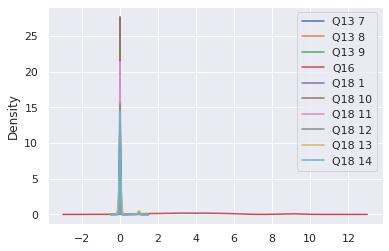

In [69]:
fig = plt.figure()
clean(num_person_df[col]).plot(kind='kde')
plt.show()

In [88]:
num_person_df = num_person_df.apply(clean, axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


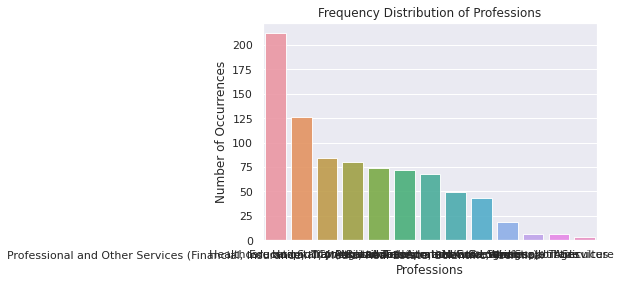

In [17]:
profession_count = cat_person_df['Q27'].value_counts()
sns.set(style="darkgrid")
sns.barplot(profession_count.index, profession_count.values, alpha=0.9)
plt.title('Frequency Distribution of Professions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Professions', fontsize=12)
plt.show()

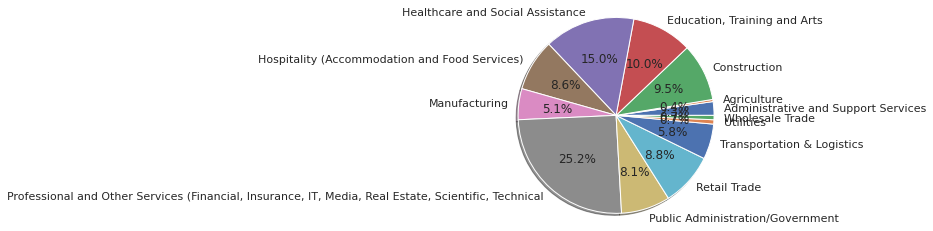

In [35]:
labels = cat_person_df['Q27'].astype('category').cat.categories.tolist()
counts = cat_person_df['Q27'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

#Scaling the dataset

In [89]:
from sklearn.preprocessing import StandardScaler


In [90]:
scaler =  StandardScaler()
dataframe = scaler.fit_transform(num_person_df)
dataframe = pd.DataFrame(data=dataframe,columns=num_person_df.columns)

In [91]:
dataframe.head(50)

,Person no,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q23,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,Q38,income,Q9,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan
0,-0.926955,-0.145431,-0.152246,-0.088475,-0.11452,-0.227455,-0.088475,-0.211246,-0.12293,-0.095626,-0.133366,-0.128247,-0.152246,-0.097301,-0.233682,-0.062439,-0.080713,-0.111583,-0.305644,-0.120188,-0.135858,-0.138309,-0.072145,-0.072145,-0.067464,-0.095626,-0.222693,-0.508078,0.305644,-0.084681,-0.217848,-0.143093,-0.156639,-0.14072,-0.150006,-0.192127,-0.160367,-0.190308,2.762478,-0.214568,-0.076547,-0.120188,2.004054,-0.286239,-0.204468,-0.102295,-0.080713,1.034913,-0.154457,-0.140720,-0.108572,-0.17713,-0.140720,-0.152246,-0.270031,1.386152,-0.378235,-0.644077,-0.108572,-0.143093,-0.122930,-0.044108,-0.120188,-0.084681,-0.088475,-0.13083,-0.612009,-0.427787,1.331836,-0.460179,-0.517139,-0.752952,-0.180981,-0.165108,-0.465334,-0.430959,-0.965013,0.764601,-0.483762,-0.801168,-0.319370,-0.365416,0.899518,-0.067464,-0.13083,-0.177130,-0.130830,-0.450856,-0.102295,-0.388930,-0.306908,-0.182879,-0.271408,-0.222693,-0.117386,-0.173205,-0.222693,-0.238268,-0.135858,-0.224290,-0.232138,-0.251629,-0.227455,-0.044108,1.061066,0.124990,-1.181716,-0.595042,-0.114520,-0.649110,-0.165108,-0.072145,-0.044108,-0.05698,2.212905,-0.268649,-0.13083,-0.095626,-1.503161,-0.214568,-0.532187,-0.338701,-0.319370,2.745161,-0.415007,-0.310680,-0.204468,-0.486816,-0.840941,1.389852,-0.314423,-0.179065,-0.133366,-0.344608,-0.947647,0.971286,-0.025449,-0.036002,-0.044108,-0.092118,-0.095626,0.279567,-0.260243,-0.853339,-0.180981,-0.11452,-0.062439,-0.025449,3.928889,-0.204468,-0.092118,-0.036002,-0.114520,-0.044108,-0.147734,-0.787081,-0.221088,-0.311931,-0.284913,-0.420351,2.249183,-0.466363,-0.491896,-0.301831,-0.133366,3.299184,-0.150006,-2.422120,-0.202744,-0.1692,-0.353939,1.238058,-0.626013,-0.435174,-0.160924,-0.143093,-0.378942,-0.239781,-0.165108,1.315174,-0.828662,-0.332734,-0.348124,-0.241287,-0.156639,0.871597,-0.411787
1,-0.083524,-0.145431,-0.152246,-0.088475,-0.11452,-0.227455,-0.088475,-0.211246,-0.12293,-0.095626,-0.133366,-0.128247,-0.152246,0.781822,-0.233682,-0.062439,-0.080713,-0.111583,-0.305644,-0.120188,-0.135858,-0.138309,-0.072145,-0.072145,-0.067464,-0.095626,-0.222693,-0.508078,0.305644,-0.084681,-0.217848,-0.143093,-0.156639,-0.14072,-0.150006,-0.192127,-1.790725,-0.190308,-0.361994,-0.214568,-0.076547,-0.120188,-0.498988,-0.286239,-0.204468,-0.102295,-0.080713,-0.966264,-0.154457,-0.140720,-0.108572,-0.17713,-0.140720,-0.152246,-0.270031,-0.856953,-0.378235,-0.644077,-0.108572,-0.143093,-0.122930,-0.044108,-0.120188,-0.084681,-0.088475,-0.13083,-0.612009,-0.427787,-0.750843,-0.460179,-0.517139,-0.752952,-0.180981,-0.165108,-0.465334,-0.430959,-0.965013,-1.307871,-0.483762,-0.801168,-0.319370,-0.365416,0.899518,-0.067464,-0.13083,-0.177130,-0.130830,-0.450856,-0.102295,-0.388930,-0.306908,-0.182879,-0.271408,-0.222693,-0.117386,-0.173205,-0.2

In [92]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Columns: 187 entries, Person no to Q32_nan
dtypes: float64(187)
memory usage: 2.2 MB


In [75]:
check_col = dataframe['Q18 3']
print(np.isnan(check_col).any())
print(np.isinf(check_col).any())

False
False


In [24]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 331 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=8d27ee34fe8c0c12785e8b156b5164a95dc656a93cb31c67c79d7a95fe735602
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [25]:
import scipy
import patsy
import pytest
%matplotlib inline
import matplotlib.pyplot as plt
import factor_analyzer
from factor_analyzer.factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

import statsmodels
from statsmodels.multivariate.factor import Factor
from statsmodels.multivariate.factor import FactorResults

import sklearn as sk
from sklearn.decomposition import FactorAnalysis


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Bartlett Sphericity and KMO test

In [93]:
chi2,p = calculate_bartlett_sphericity(dataframe)
print("Bartlett Sphericity Test")
print("Chi squared value : ",chi2)
print("p value : ",p)

Bartlett Sphericity Test
Chi squared value :  626237.7302650701
p value :  0.0


In [94]:
kmo_all,kmo_model = calculate_kmo(dataframe)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.5903733800149897


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [96]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2, p = calculate_bartlett_sphericity(dataframe)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  626237.7302650701
p value :  0.0


#Factor Analysis

In [97]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=num_person_df.shape[1])

In [98]:
fa.fit(num_person_df)

FactorAnalyzer(impute='drop', n_factors=187, rotation=None, rotation_kwargs={})

In [99]:
ev,_ = fa.get_eigenvalues()

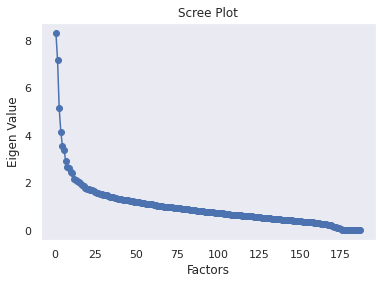

In [100]:
plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

#Taking 6 factors

In [101]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(num_person_df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [102]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_eigenvalues()[0],columns=['EigenValues']))

      EigenValues
0    8.335993e+00
1    7.179092e+00
2    5.150670e+00
3    4.161301e+00
4    3.542461e+00
5    3.378411e+00
6    2.918241e+00
7    2.662761e+00
8    2.611680e+00
9    2.483428e+00
10   2.438728e+00
11   2.178860e+00
12   2.144765e+00
13   2.075889e+00
14   2.024556e+00
15   1.991372e+00
16   1.930687e+00
17   1.871785e+00
18   1.783792e+00
19   1.755118e+00
20   1.754168e+00
21   1.712698e+00
22   1.695975e+00
23   1.671333e+00
24   1.625240e+00
25   1.592311e+00
26   1.582995e+00
27   1.546950e+00
28   1.539415e+00
29   1.507427e+00
30   1.484531e+00
31   1.474801e+00
32   1.472056e+00
33   1.422482e+00
34   1.402171e+00
35   1.394200e+00
36   1.377093e+00
37   1.371429e+00
38   1.337274e+00
39   1.322831e+00
40   1.310651e+00
41   1.287092e+00
42   1.280412e+00
43   1.266499e+00
44   1.263787e+00
45   1.253148e+00
46   1.231763e+00
47   1.228226e+00
48   1.210634e+00
49   1.202522e+00
50   1.188582e+00
51   1.185767e+00
52   1.165940e+00
53   1.156861e+00
54   1.137

In [103]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.loadings_,index=dataframe.columns))

                       0         1         2         3         4         5
Person no       0.600264 -0.389371 -0.177102  0.199626 -0.036800 -0.007945
Q13 1           0.028979 -0.079415  0.016459  0.008600  0.066430 -0.031806
Q13 10         -0.009987  0.019850  0.052592 -0.005657  0.055446  0.079320
Q13 11          0.008566  0.018381  0.167724  0.034390 -0.040395  0.029680
Q13 12         -0.006052  0.043515 -0.001180  0.034193 -0.036491  0.115515
Q13 2          -0.014464 -0.153794  0.080573  0.030351 -0.051896 -0.040573
Q13 3           0.022911  0.026921 -0.040213  0.048450 -0.009086 -0.029659
Q13 4          -0.016065 -0.024819  0.067060  0.040730  0.072455  0.006200
Q13 5          -0.003346  0.146504  0.010572 -0.031242  0.011065  0.042636
Q13 6           0.011611 -0.076262 -0.038035  0.022015 -0.001267 -0.100481
Q13 7          -0.036022 -0.070999  0.104441  0.018212 -0.004236  0.034258
Q13 8           0.076776 -0.024245  0.074768 -0.008588  0.060941  0.032888
Q13 9          -0.001873 

In [110]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          6.019735  5.469356  4.987858  4.321785  3.687632  3.049275
Proportional Var  0.032191  0.029248  0.026673  0.023111  0.019720  0.016306
Cumulative Var    0.032191  0.061439  0.088112  0.111223  0.130943  0.147249


In [105]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_uniquenesses(),index=dataframe.columns,columns=['Uniqueness']))

                Uniqueness
Person no         0.415440
Q13 1             0.987084
Q13 10            0.987342
Q13 11            0.967762
Q13 12            0.982224
Q13 2             0.964386
Q13 3             0.993824
Q13 4             0.987682
Q13 5             0.975497
Q13 6             0.982020
Q13 7             0.981230
Q13 8             0.983058
Q13 9             0.977417
Q16               0.895627
Q18 1             0.829385
Q18 10            0.982011
Q18 11            0.948196
Q18 12            0.816695
Q18 13            0.742671
Q18 14            0.993179
Q18 2             0.933205
Q18 4             0.857620
Q18 5             0.731856
Q18 6             0.499288
Q18 7             0.556193
Q18 8             0.785993
Q18 9             0.923486
Q18 Disability    0.565222
Q19 1             0.356611
Q19 2             0.912711
Q19 3             0.569961
Q19 4             0.792623
Q19 5             0.629793
Q19 6             0.600887
Q19 7             0.817584
Q19 8             0.559294
Q

In [106]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities']))

                Communalities
Person no            0.584560
Q13 1                0.012916
Q13 10               0.012658
Q13 11               0.032238
Q13 12               0.017776
Q13 2                0.035614
Q13 3                0.006176
Q13 4                0.012318
Q13 5                0.024503
Q13 6                0.017980
Q13 7                0.018770
Q13 8                0.016942
Q13 9                0.022583
Q16                  0.104373
Q18 1                0.170615
Q18 10               0.017989
Q18 11               0.051804
Q18 12               0.183305
Q18 13               0.257329
Q18 14               0.006821
Q18 2                0.066795
Q18 4                0.142380
Q18 5                0.268144
Q18 6                0.500712
Q18 7                0.443807
Q18 8                0.214007
Q18 9                0.076514
Q18 Disability       0.434778
Q19 1                0.643389
Q19 2                0.087289
Q19 3                0.430039
Q19 4                0.207377
Q19 5     

Other examples

In [107]:
# Fit Exploratory FA model to data with stats models then extract results
sm = Factor(endog=num_person_df, n_factor=5, corr=None, method='ml', smc=True, endog_names=None, nobs=None, missing='drop')

In [108]:
sm.fit()
sm_results = FactorResults(sm)

In [20]:
# Fit Exploratory FA with FactorAnalyzer
fa = FactorAnalyzer(n_factors=4, rotation='varimax', method='ml', use_smc=True, is_corr_matrix=False, bounds=(0.005,1), impute='drop', rotation_kwargs=None)


In [109]:
fa.fit(num_person_df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})